# Verificación y Cambio de Directorio de Trabajo

In [1]:
import os
cwd = os.getcwd()
print (cwd)

C:\Users\andyg\OneDrive\Becas PINN MICIT\Material Cenfotec BigData\Entrega 19 Complete a Data Science Capstone Project


In [2]:
os.chdir(r"C:\Users\andyg\OneDrive\Becas PINN MICIT\Material Cenfotec BigData\Entrega 19 Complete a Data Science Capstone Project")

In [3]:
print (cwd)

C:\Users\andyg\OneDrive\Becas PINN MICIT\Material Cenfotec BigData\Entrega 19 Complete a Data Science Capstone Project


# Importamos Dependencias y Librerias

In [4]:
%matplotlib inline
import math, time, random, datetime
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn import datasets
import scipy
from math import sqrt

import cufflinks as cf
from pandas import Series, DataFrame
import matplotlib as mpl
from matplotlib import pylab
from pylab import *
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Definir el tamaño por defecto de las figuras
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


# Transformación de datos
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Validacion Cruzada
from sklearn.model_selection import train_test_split
import catboost

#Algortimos 

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier

import warnings
warnings.filterwarnings("ignore")

#Metricas del Modelo y Evaluaciones
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Hacemos la Lectura del DataSet

In [5]:
#Lectura DataSet
DataSet = pd.read_csv('weatherAUS.csv')

In [6]:
DataSet.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
DataSet.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [8]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [ ]:
pandas_profiling.ProfileReport(DataSet)

# Procesamiento del Set de Datos Limpieza

In [ ]:
#Guardamos el primer EDA generado
ProfileReport(DataSet).to_file(output_file="DataSetProfilingInicial.html")

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

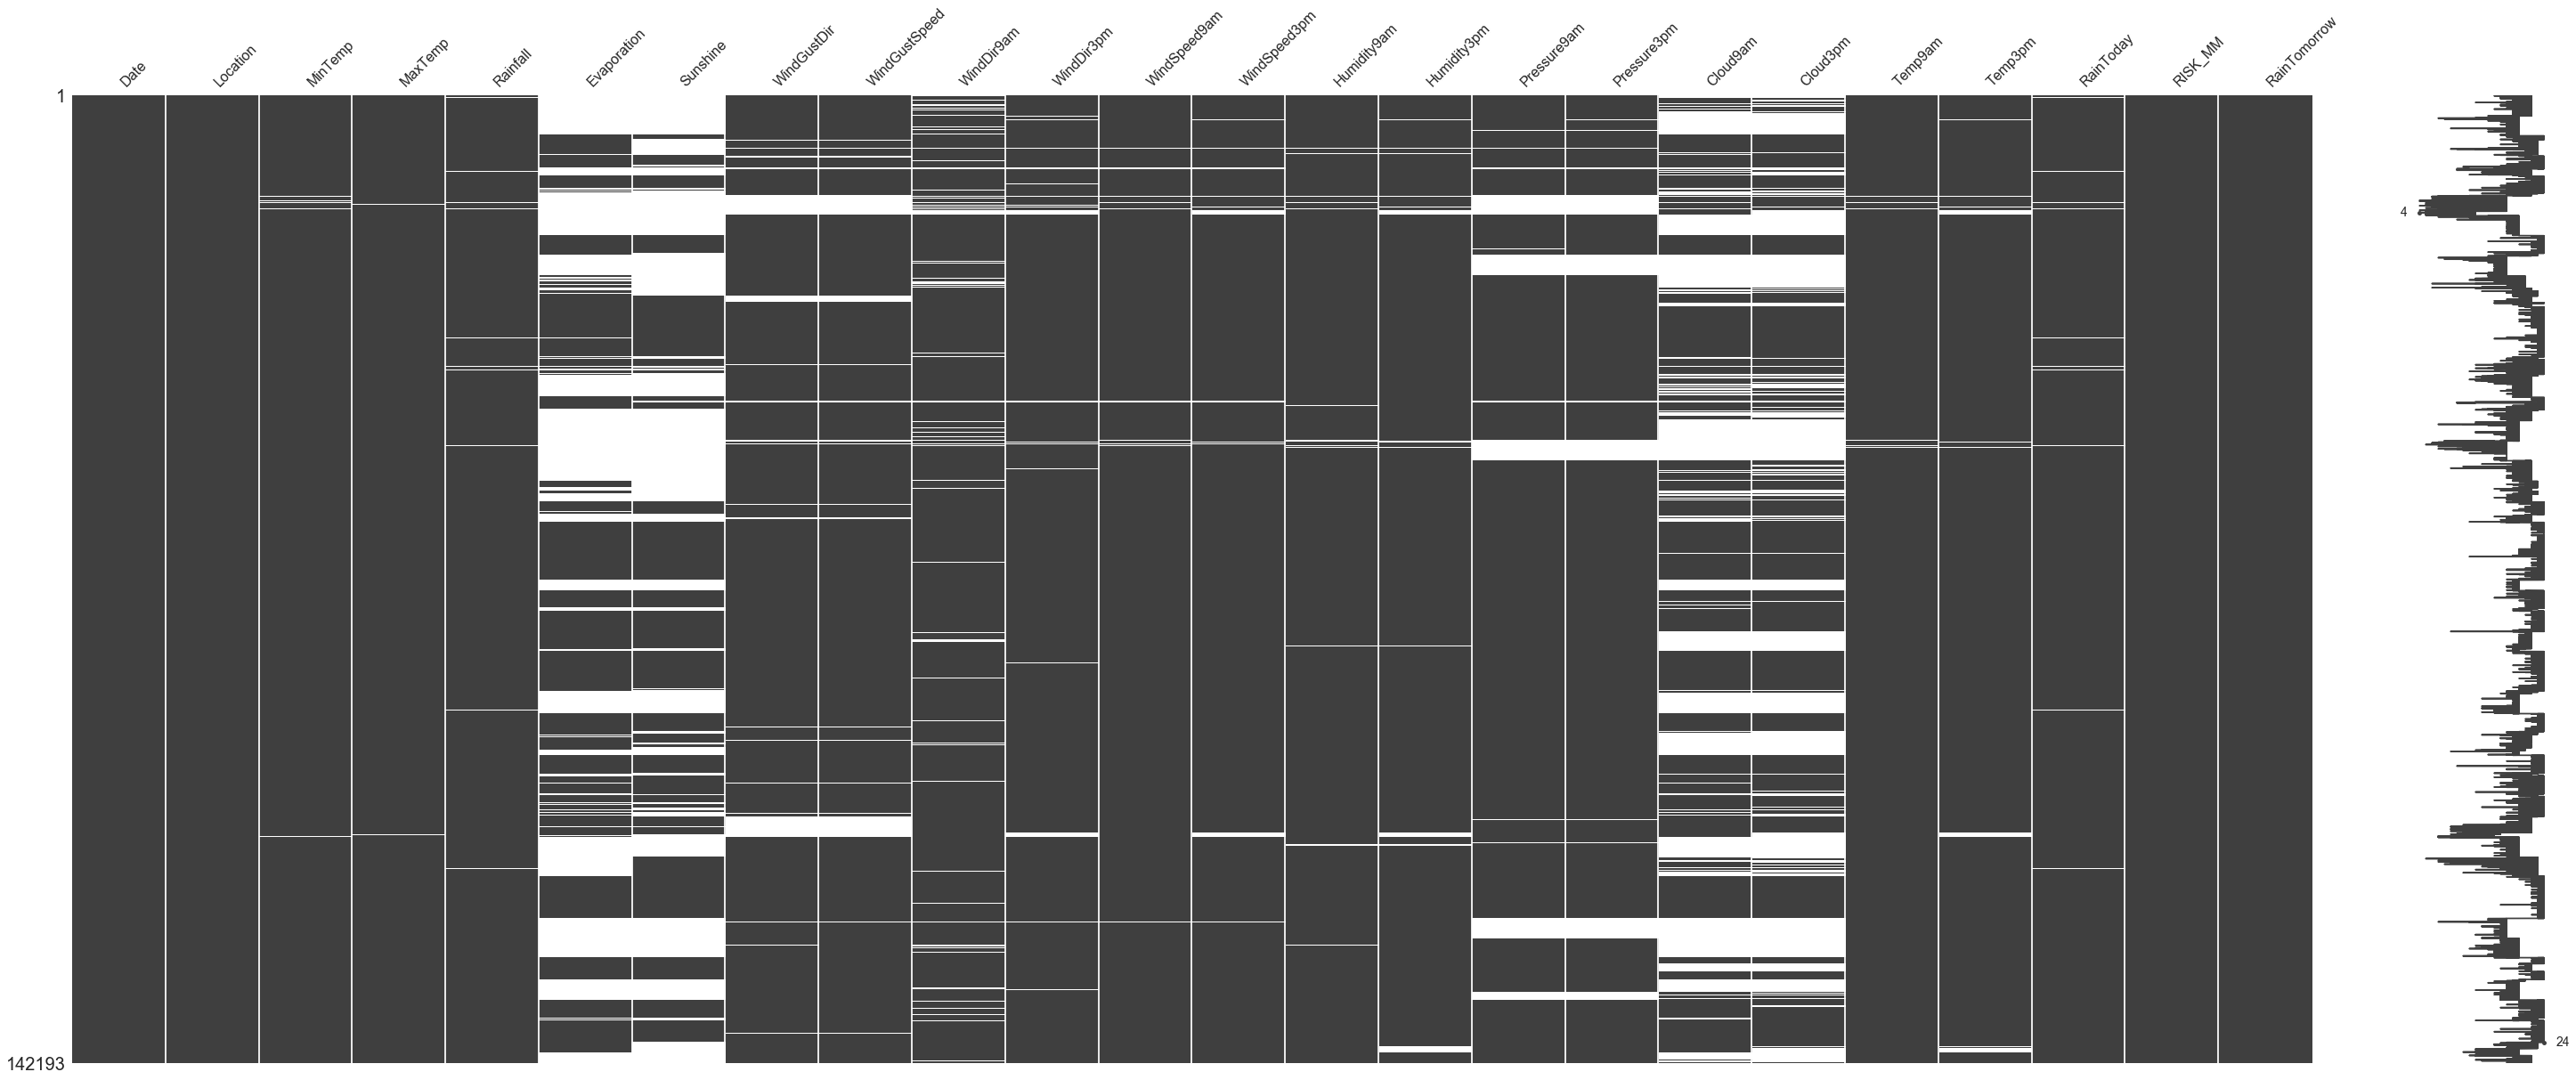

In [9]:
#Encontrando valores perdidos
#Del EDA se derivan las siguientes variables con muchos valores perdidos 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'
missingno.matrix(DataSet, figsize = (50, 20))
DataSet.isnull().sum()

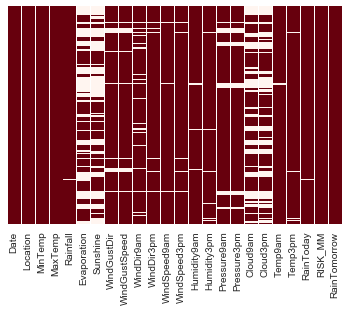

In [10]:
# Visualising missing data:
sns.heatmap(DataSet.isnull(),yticklabels=False,cbar=False,cmap='Reds_r')

In [11]:
# Eliminamos las variables con muchos datos perdidos y la variable RISK_MM 
DataSet = DataSet.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RISK_MM'], axis = 1)

In [12]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null object
dtypes: float64(12), object(7)
memory usage: 20.6+ MB


# Transformación de Datos para la predicción 

In [13]:
#'''Cambio del campo fecha a mes'''
DataSet['Date'] = pd.to_datetime(DataSet['Date']).dt.month
DataSet.rename(columns={'Date':'Mes'}, inplace=True)

In [14]:
#'''Cambio de Variables RainToday y RainTommorrow; a No = 0, Yes: 1'''
DataSet['RainToday'] = DataSet['RainToday'].map( {'No':0, 'Yes':1} ) 
DataSet['RainTomorrow'] = DataSet['RainTomorrow'].map( {'No':0, 'Yes': 1} )

In [15]:
# Cambiar las varaibles categoricas vars a numerica
objs = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in objs:
    l = DataSet[column].value_counts().index.tolist() 
    mapping = {x:y for x,y in zip(l, range(len(l)))}
    DataSet[column] = DataSet[column].map(mapping)

In [16]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
Mes              142193 non-null int64
Location         142193 non-null int64
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
WindGustDir      132863 non-null float64
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null float64
WindDir3pm       138415 non-null float64
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null float64
RainTomorrow     142193 non-null int64
dtypes: float64(16), int64(3)
memory usage: 20.6 MB


In [17]:
DataSet.head()

,Mes,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,14,13.4,22.9,0.6,0.0,44.0,6.0,7.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,12,14,7.4,25.1,0.0,9.0,44.0,9.0,3.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12,14,12.9,25.7,0.0,6.0,46.0,6.0,3.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,12,14,9.2,28.0,0.0,13.0,24.0,1.0,10.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,12,14,17.5,32.3,1.0,0.0,41.0,10.0,8.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


# Se Gestionan los Datos Vacíos

In [18]:
columns_NaN = DataSet.columns[DataSet.isnull().any()]
columns_NaN

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [19]:
for column in columns_NaN:
    DataSet[column].fillna(DataSet[column].mean(), inplace=True)

In [20]:
DataSet.isnull().sum()

Mes              0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
#Ejecutamos nuevamente el Panda Profiling para analizar el nuevo Set de Datos generado
#Guardamos el segundo EDA generado
ProfileReport(DataSet).to_file(output_file="DataSetProfilingSegundo2.html")

In [22]:
#Debido a la alta correlación de las variable 
DataSet = DataSet.drop(['Temp3pm', 'Temp9am', 'Pressure3pm'], axis=1)

In [ ]:
#Ejecutamos nuevamente el Panda Profiling para analizar el nuevo Set de Datos generado
#Guardamos el segundo EDA generado
ProfileReport(DataSet).to_file(output_file="DataSetProfilingSegundo3.html")

In [23]:
# Eliminamos Valores Duplicados del Set de Datos 
DataSet.drop_duplicates(keep=False,inplace=True)

In [24]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142150 entries, 0 to 142192
Data columns (total 16 columns):
Mes              142150 non-null int64
Location         142150 non-null int64
MinTemp          142150 non-null float64
MaxTemp          142150 non-null float64
Rainfall         142150 non-null float64
WindGustDir      142150 non-null float64
WindGustSpeed    142150 non-null float64
WindDir9am       142150 non-null float64
WindDir3pm       142150 non-null float64
WindSpeed9am     142150 non-null float64
WindSpeed3pm     142150 non-null float64
Humidity9am      142150 non-null float64
Humidity3pm      142150 non-null float64
Pressure9am      142150 non-null float64
RainToday        142150 non-null float64
RainTomorrow     142150 non-null int64
dtypes: float64(13), int64(3)
memory usage: 18.4 MB


In [25]:
DataSet.shape

(142150, 16)

In [26]:
# Chequeando valores nulos nuevamente
pd.isnull(DataSet)

,Mes,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142189,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142190,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142191,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
DataSet.iplot()

0    110275
1     31875
Name: RainTomorrow, dtype: int64


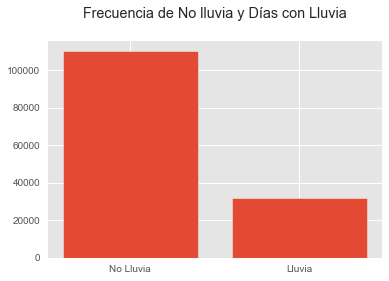

In [29]:
# Frequency of Rainy and No Rain:
mpl.style.use('ggplot')
plt.figure(figsize=(6,4))
plt.hist(DataSet['RainTomorrow'],bins=2,rwidth=0.8)
plt.xticks([0.25,0.75],['No Lluvia','Lluvia'])
plt.title('Frecuencia de No lluvia y Días con Lluvia\n')
print(DataSet['RainTomorrow'].value_counts())

# Separamos los Datos de Entrenamiento y Prueba

In [30]:
#Creación de los datos de evaluacion
X = DataSet.drop(['RainTomorrow'], axis=1) # data
y = DataSet.RainTomorrow #etiquetas, objetivo de predicción
X.head()

,Mes,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday
0,12,14,13.4,22.9,0.6,0.0,44.0,6.0,7.0,20.0,24.0,71.0,22.0,1007.7,0.0
1,12,14,7.4,25.1,0.0,9.0,44.0,9.0,3.0,4.0,22.0,44.0,25.0,1010.6,0.0
2,12,14,12.9,25.7,0.0,6.0,46.0,6.0,3.0,19.0,26.0,38.0,30.0,1007.6,0.0
3,12,14,9.2,28.0,0.0,13.0,24.0,1.0,10.0,11.0,9.0,45.0,16.0,1017.6,0.0
4,12,14,17.5,32.3,1.0,0.0,41.0,10.0,8.0,7.0,20.0,82.0,33.0,1010.8,0.0


In [31]:
 # Separación de Entrenamiento / Prueba de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Success of getting train / test dataset")
print("=======================================")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
print("=======================================")

Success of getting train / test dataset
X_train:  (99505, 15)
y_train:  (99505,)
X_test:  (42645, 15)
y_test:  (42645,)


In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test,shape

((99505, 15), (42645, 15), (99505,), 141239    0
 136187    0
 74568     0
 120218    0
 64628     0
          ..
 110177    0
 1916      0
 124848    0
 86887     0
 65473     1
 Name: RainTomorrow, Length: 42645, dtype: int64, <function numpy.shape(a)>)

# Creando los Modelos de Predicción

In [ ]:
# Revision de varios modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GBC', GradientBoostingClassifier(max_depth=100, n_estimators=1000,learning_rate=0.1)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(250, 100), random_state=10)))
models.append(('SGDC', SGDClassifier()))
models.append(('RFC',RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=0, n_jobs = -1)))
# Evaluar cada modelo por turno
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
# Comparar Algortimos
pyplot.boxplot(results, labels=names)
pyplot.title('Camparación de Resultados Algoritmos')
pyplot.show()

In [ ]:
#Nueva Evaluación con mejor algoritmo
RFC = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=0)
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
print (y_pred)

In [ ]:
# Evaluacion de la predicción
print ("Precision")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print ("Reporte de Clasificación")
print(classification_report(y_test, y_pred))
print ("RMSE")
print (mean_squared_error(y_test, y_pred)) #MSE
print ("Recall Score")
print (recall_score(y_test, y_pred, average=None))# Precision
print ("Presicion Score")
print (precision_score(y_test, y_pred, average=None))

In [ ]:
#Revisamos los ajustes por defecto del algortimo
#RF = RandomForestClassifier()
print('Parametros Actuales en Uso:\n')
pprint(RFC.get_params())

# Parametros para Mejorar la Predicción

In [ ]:
# Parametros de Ajuste RandomForest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 5000, num = 15)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
min_samples_split = [2,3,4,10,20]
min_samples_leaf = [1,2,3,10,15]
bootstrap = [True, False]

In [ ]:
# Creacion de la Grid para la busqueda
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RFC, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = 4)
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(RFC, X_test, y_test):
    predictions = RFC.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = accuracy_score(y_test, np.round(predictions,0).astype(int))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))  
    return accuracy

In [ ]:
base_model = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=0)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
print('Mejora de{:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
# Creación de parametros basado en la mejora anterior
param_grid = {
    'bootstrap': [False],
    'max_depth': [50,100,110,150],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2],
    'min_samples_split': [10,12,15],
    'n_estimators': [4142,4500,5000]
}

In [ ]:
# Create a based model
RFC = RandomForestClassifier()

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = 3, n_jobs = 4, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

In [ ]:
print('Mejora de {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

# Predicción con Mejor Parametro de Ajuste

In [ ]:
#Nueva Evaluación con mejor parametro
RFC = RandomForestClassifier(n_estimators=5000, bootstrap= False, max_depth=100, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto')
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
print (y_pred)

In [ ]:
# Evaluacion de la predicción
print ("Precision")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print ("Reporte de Clasificación")
print(classification_report(y_test, y_pred))
print ("RMSE")
print (mean_squared_error(y_test, y_pred)) 
print ("Recall Score")
print (recall_score(y_test, y_pred, average=None))
print ("Presicion Score")
print (precision_score(y_test, y_pred, average=None))